# STOP VIOLENCE AGAINST WOMEN!

## **महिलाओं के खिलाफ हिंसा करना बंद करें!**

This data is collated from https://data.gov.in. It has state-wise and district level data on the various crimes committed against women between 2001 to 2014. 
The crimes included are:
* Rape
* Kidnapping and Abduction
* Dowry Deaths
* Assault on women with intent to outrage her modesty
* Insult to modesty of Women
* Cruelty by Husband or his Relatives
* Importation of Girls

**Import libraries**

In [21]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

**Read csv file**

In [22]:
filepath = 'crimes_against_women_2001-2014.csv'
data = pd.read_csv(filepath)

**I create a copy of the dataset I will work on**

In [23]:
df = data.copy()

**A little overview on the dataset**

In [24]:
df.head(2)

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0


A little description of the features:
- **'Unnamed:0'** -> index;
- **State or UT Name** -> name of the State or Union Territories
- **District** -> Name of the district
- **Year** -> year when it happend
- The other columns have a self explanatory name 


**Then let's see what types of data we have**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 11 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Unnamed: 0                                           10677 non-null  int64 
 1   STATE/UT                                             10677 non-null  object
 2   DISTRICT                                             10677 non-null  object
 3   Year                                                 10677 non-null  int64 
 4   Rape                                                 10677 non-null  int64 
 5   Kidnapping and Abduction                             10677 non-null  int64 
 6   Dowry Deaths                                         10677 non-null  int64 
 7   Assault on women with intent to outrage her modesty  10677 non-null  int64 
 8   Insult to modesty of Women                           10677 non-null  int64 


**See the shapes of the dataset**

In [26]:
df.shape

(10677, 11)

**Drop the index column that is useless**

In [27]:
df = df.drop(columns = 'Unnamed: 0')

**Drop the duplicates of the states**

In [28]:
df["STATE/UT"]=df.apply(lambda row:row['STATE/UT'].replace(" ","").lower(),axis=1)
df['STATE/UT'].replace("delhiut",'delhi',inplace=True)

**But excuse the ignorance, which are the States and union territories of India?**

In [29]:
states=df['STATE/UT'].unique()
print("Number of states/territories without duplicates: ", len(states))

print(states)

Number of states/territories without duplicates:  36
['andhrapradesh' 'arunachalpradesh' 'assam' 'bihar' 'chhattisgarh' 'goa'
 'gujarat' 'haryana' 'himachalpradesh' 'jammu&kashmir' 'jharkhand'
 'karnataka' 'kerala' 'madhyapradesh' 'maharashtra' 'manipur' 'meghalaya'
 'mizoram' 'nagaland' 'odisha' 'punjab' 'rajasthan' 'sikkim' 'tamilnadu'
 'tripura' 'uttarpradesh' 'uttarakhand' 'westbengal' 'a&nislands'
 'chandigarh' 'd&nhaveli' 'daman&diu' 'delhi' 'lakshadweep' 'puducherry'
 'telangana']


**Create a new feature that contains a sum of all the crimes of a country**

In [30]:
df['total_crimes']=(df['Rape']+df['Kidnapping and Abduction']+df['Dowry Deaths']+
                       df['Assault on women with intent to outrage her modesty']+
                       df['Insult to modesty of Women']+df['Cruelty by Husband or his Relatives']+
                       df['Importation of Girls'])

**Let's create a dataframe that contains the sum of the crimes of all the states group by years**

In [31]:
#total_crimes
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','total_crimes']

df1=pd.DataFrame()
for i in crimes:
    df_crimes=df.groupby(['Year'])[i].sum()
    df1[i]=df_crimes
df1

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
Year,,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228,261450
2002,32746,29012,13644,67886,20310,98474,152,262224
2003,31694,26592,12416,65878,24650,101406,92,262728
2004,36466,31156,14052,69134,20002,116242,178,287230
2005,36718,31500,13574,68350,19968,116638,298,287046
2006,38696,34828,15236,73234,19932,126256,134,308316
2007,41474,40832,16186,77468,21900,151860,122,349842
2008,42934,45878,16344,80826,24428,162688,134,373232
2009,42794,51482,16766,77422,22018,179092,96,389670


**And a more simple look of the total number number of crimes in each year with a barplot**

In [32]:
fig = px.bar(df1, x = df1.index,
             y = 'total_crimes', title = "Total Number Of Crimes In Each Year")
fig.show()

<AxesSubplot:xlabel='Year', ylabel='total_crimes'>

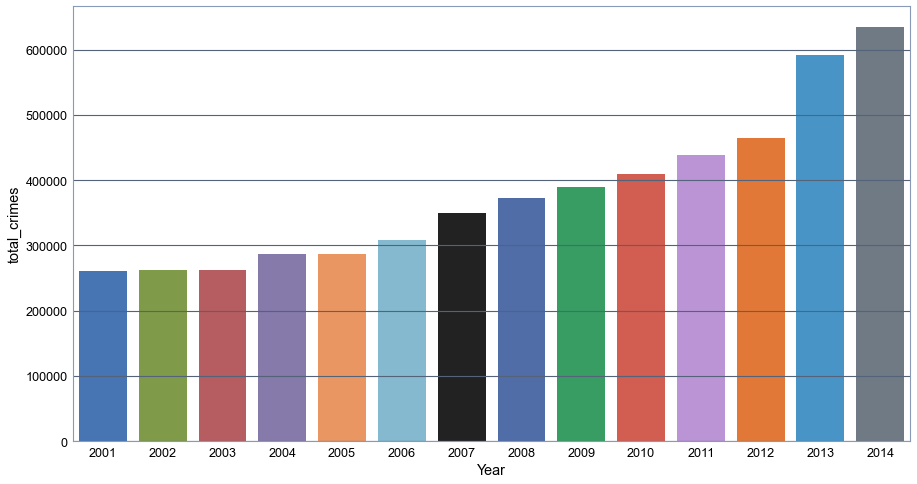

In [38]:
plt.figure(facecolor='white', figsize=(15,8))
mpl.rcParams.update({'text.color' : "black", 'axes.labelcolor' : "black", 'xtick.color': "black", 'ytick.color': "black",'axes.facecolor':"white"})

sns.barplot(data=df1,x = df1.index,y = 'total_crimes')

**Have a more simple look also about all the crimes** 

In [39]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 4, cols = 2, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=("Rape","Dowry Deaths",
                                    "Kidnapping and Abduction",
                                    "Assault on women to outrage",
                                    "Insult to modesty of Women",
                                    "Cruelty by Husband or his Relatives",
                                    "Importation of Girls", "total_crimes"))

fig.add_trace(go.Scatter(x = df1.index, y = df1['Rape']),row = 1, col = 1)
fig.add_trace(go.Scatter(x = df1.index, y = df1['Dowry Deaths']),row = 1, col = 2)
fig.add_trace(go.Scatter(x = df1.index, y = df1['Kidnapping and Abduction']),row = 2, col = 1)
fig.add_trace(go.Scatter(x = df1.index, y = df1['Assault on women with intent to outrage her modesty']),row = 2, col = 2)
fig.add_trace(go.Scatter(x = df1.index, y = df1['Insult to modesty of Women']),row = 3, col = 1)
fig.add_trace(go.Scatter(x = df1.index, y = df1['Cruelty by Husband or his Relatives']),row = 3, col = 2)
fig.add_trace(go.Scatter(x = df1.index, y = df1['Importation of Girls']),row= 4 , col = 1)
fig.add_trace(go.Scatter(x = df1.index, y = df1['total_crimes']),row = 4, col = 2)

fig.update_layout(height=700, showlegend=False)

fig.show()

<AxesSubplot:xlabel='Year', ylabel='total_crimes'>

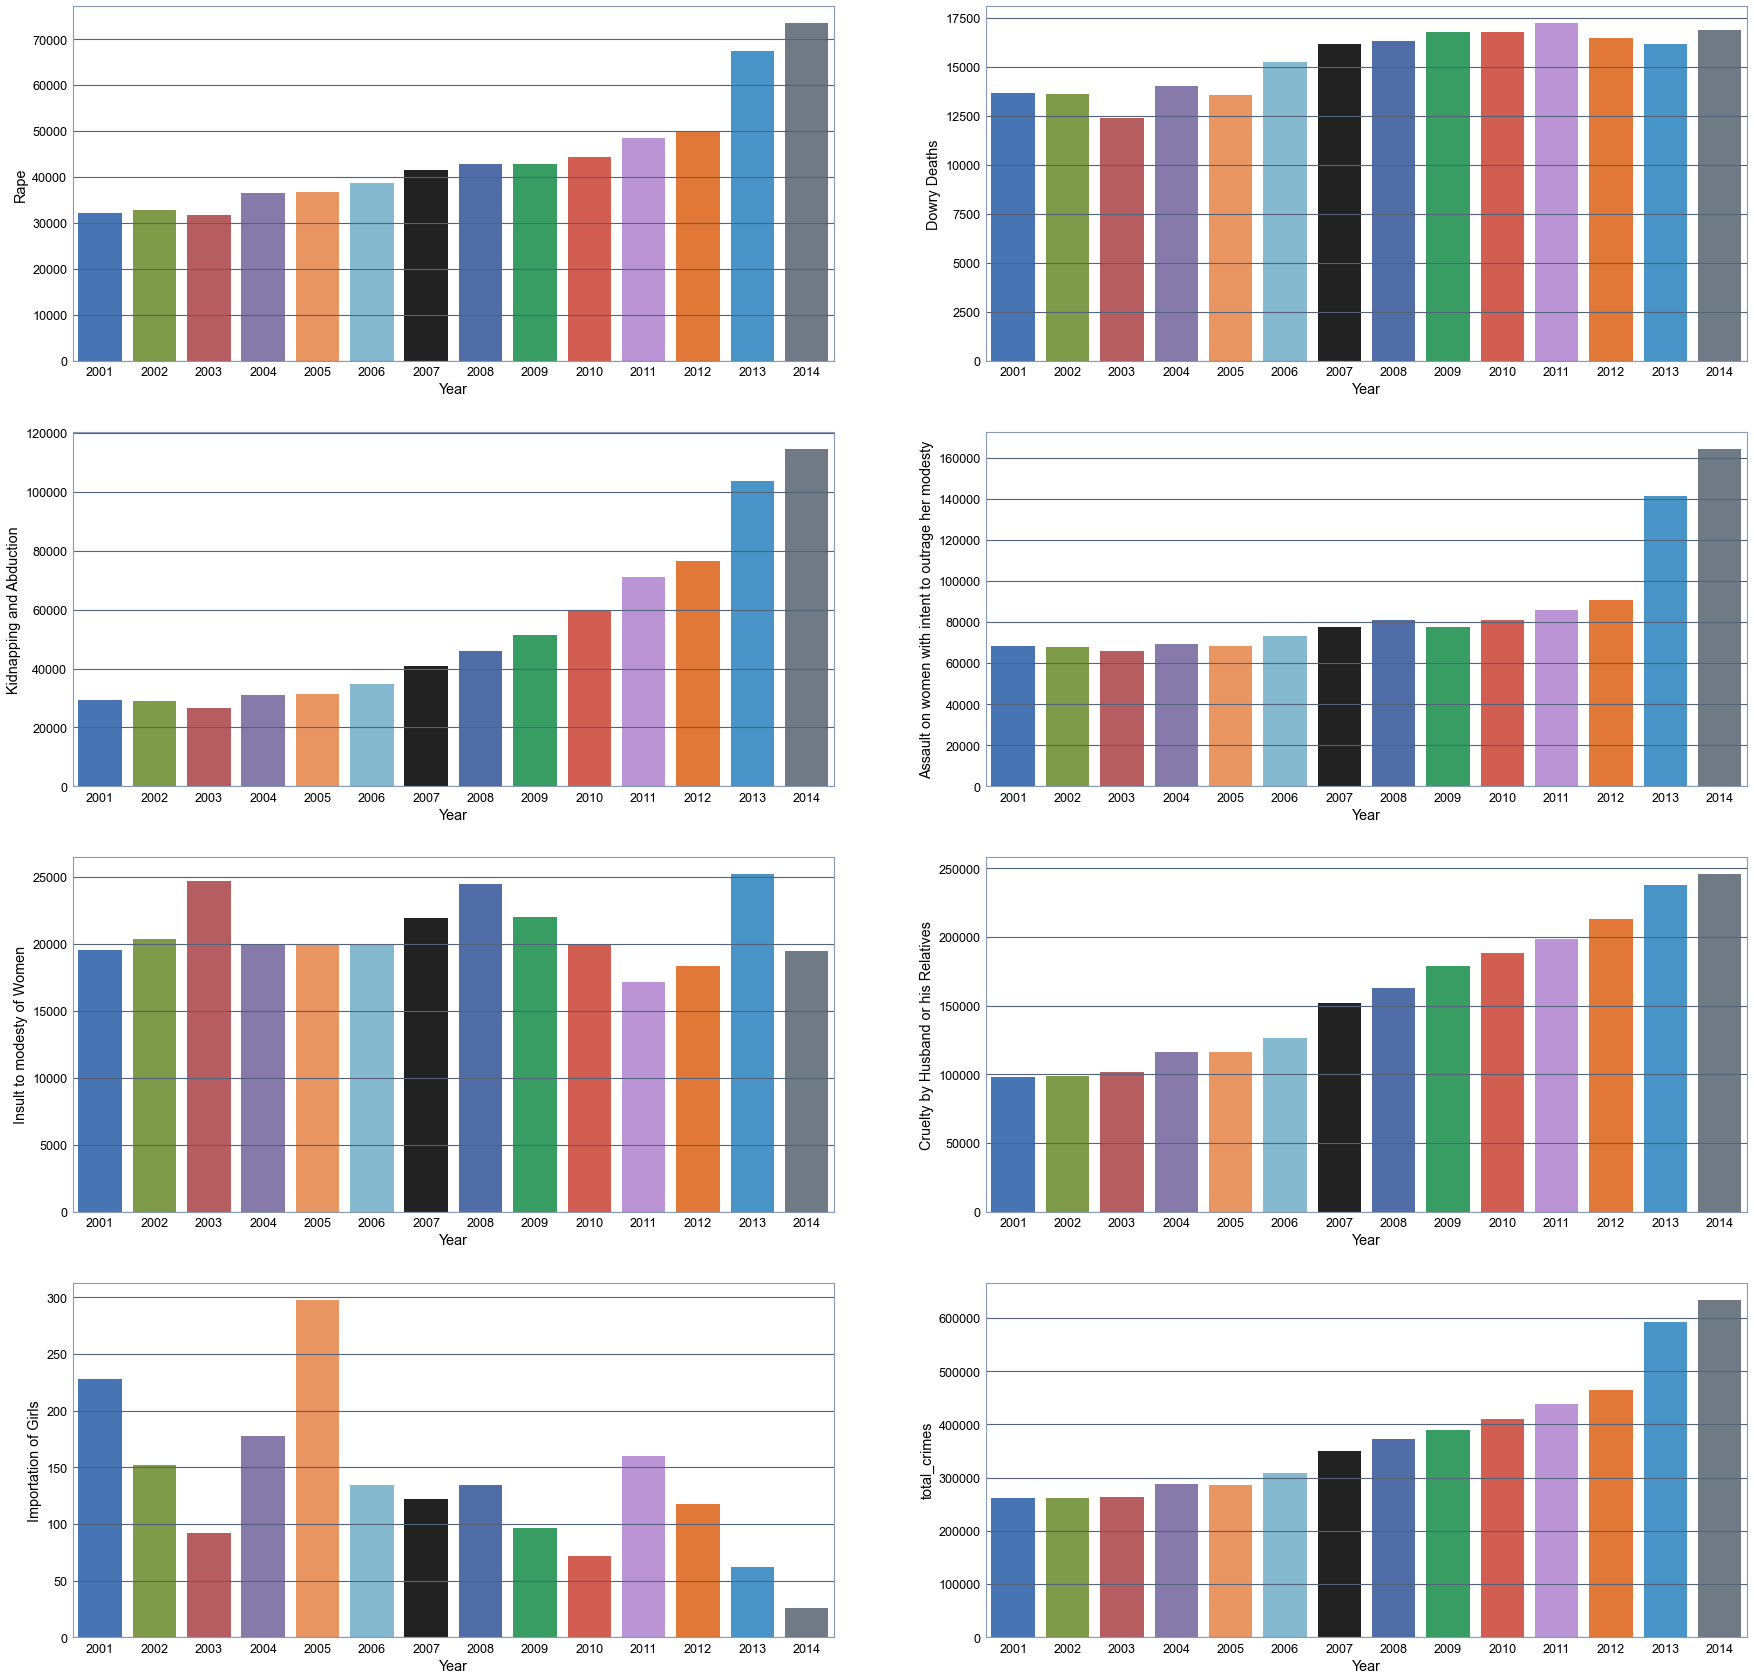

In [78]:
fig,axes = plt.subplots(4,2,facecolor='white',figsize=(30,30))
sns.barplot(ax=axes[0][0],x = df1.index, y = df1['Rape'])
sns.barplot(ax=axes[0][1],x = df1.index, y = df1['Dowry Deaths'])
sns.barplot(ax=axes[1][0],x = df1.index, y = df1['Kidnapping and Abduction'])
sns.barplot(ax=axes[1][1],x = df1.index, y = df1['Assault on women with intent to outrage her modesty'])
sns.barplot(ax=axes[2][0],x = df1.index, y = df1['Insult to modesty of Women'])
sns.barplot(ax=axes[2][1],x = df1.index, y = df1['Cruelty by Husband or his Relatives'])
sns.barplot(ax=axes[3][0],x = df1.index, y = df1['Importation of Girls'])
sns.barplot(ax=axes[3][1],x = df1.index, y = df1['total_crimes'])



**Comparing What Part Of Total Crimes are Rape.**


<AxesSubplot:xlabel='Year', ylabel='Rape'>

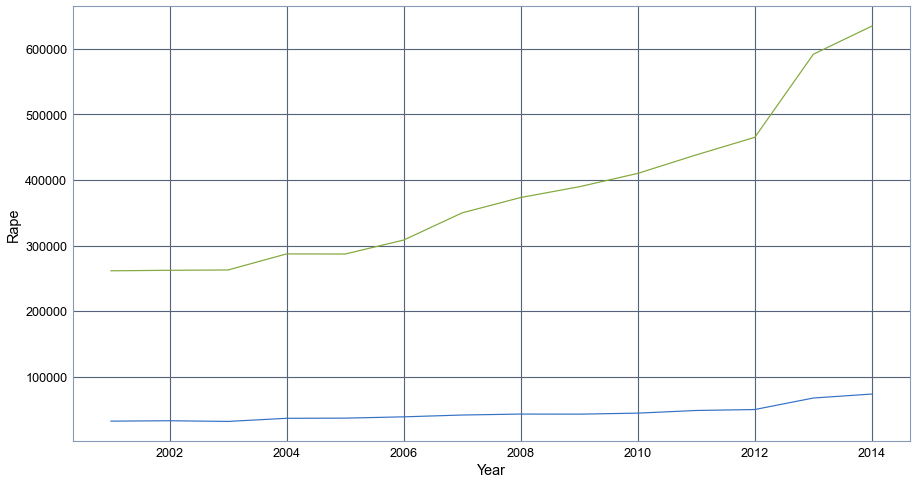

In [43]:
plt.figure(facecolor='white', figsize=(15,8))

sns.lineplot(data=df1,x=df1.index,y=df1['Rape'])
sns.lineplot(data=df1,x=df1.index,y=df1['total_crimes'])

# **What are the most common crimes?**

In [44]:
 crimes1 = ['Rape',
 'Kidnapping and Abduction',
 'Dowry Deaths',
 'Assault on women with intent to outrage her modesty',
 'Insult to modesty of Women',
 'Cruelty by Husband or his Relatives',
 'Importation of Girls']

In [45]:
df_top_crimes=pd.DataFrame(columns=['crimes',"total"])
for i in crimes1:
    df_top_crimes=df_top_crimes.append({'crimes':i ,'total':df[i].sum(axis=0)},ignore_index=True)


fig = go.Figure(data=[go.Pie(labels=df_top_crimes['crimes'], values= df_top_crimes['total'], hole=.3)])
fig.update_layout(title_text = "Pie Chart of the crimes in India")
fig.show()

**There have been changes between 2001 and 2014? I hope that but let's have a look with 2 pie charts**

In [46]:
labels = ['Rape','Kidnapping and Abduction','Dowry Deaths','Assault on women with intent to outrage her modesty',
 'Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls']

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['2001', '2014'])
fig.add_trace(go.Pie(labels=labels, values=[32150, 29290, 13702, 68248, 19492, 98340, 228],
                     scalegroup='one', name="India crimes in 2001"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=[73470, 114622, 16910, 164470, 19470, 245754, 26],
                     scalegroup='one', name="India crimes in 2014"), 1, 2)

fig.update_layout(title_text='India crimes pie charts')
fig.show()

As we can see there haven't been many changes, there has only been a slight increase in dowry deaths, a sharp decrease in kidnapping and abudction and a decrease of the insults to modesty of Women.

# **What are the countries with more crimes?**

In [47]:
states=df['STATE/UT'].unique()

In [48]:
df_state=pd.DataFrame()
for i in crimes:
    df_state_crimes=df.groupby(['STATE/UT'])[i].sum()
    df_state[i]=df_state_crimes


fig = px.bar(df_state, x = df_state.index,
             y = 'total_crimes', title = "Total Number Of Crimes In Each Country")
fig.update_xaxes(categoryorder = 'total descending')
fig.show()

<AxesSubplot:xlabel='STATE/UT', ylabel='total_crimes'>

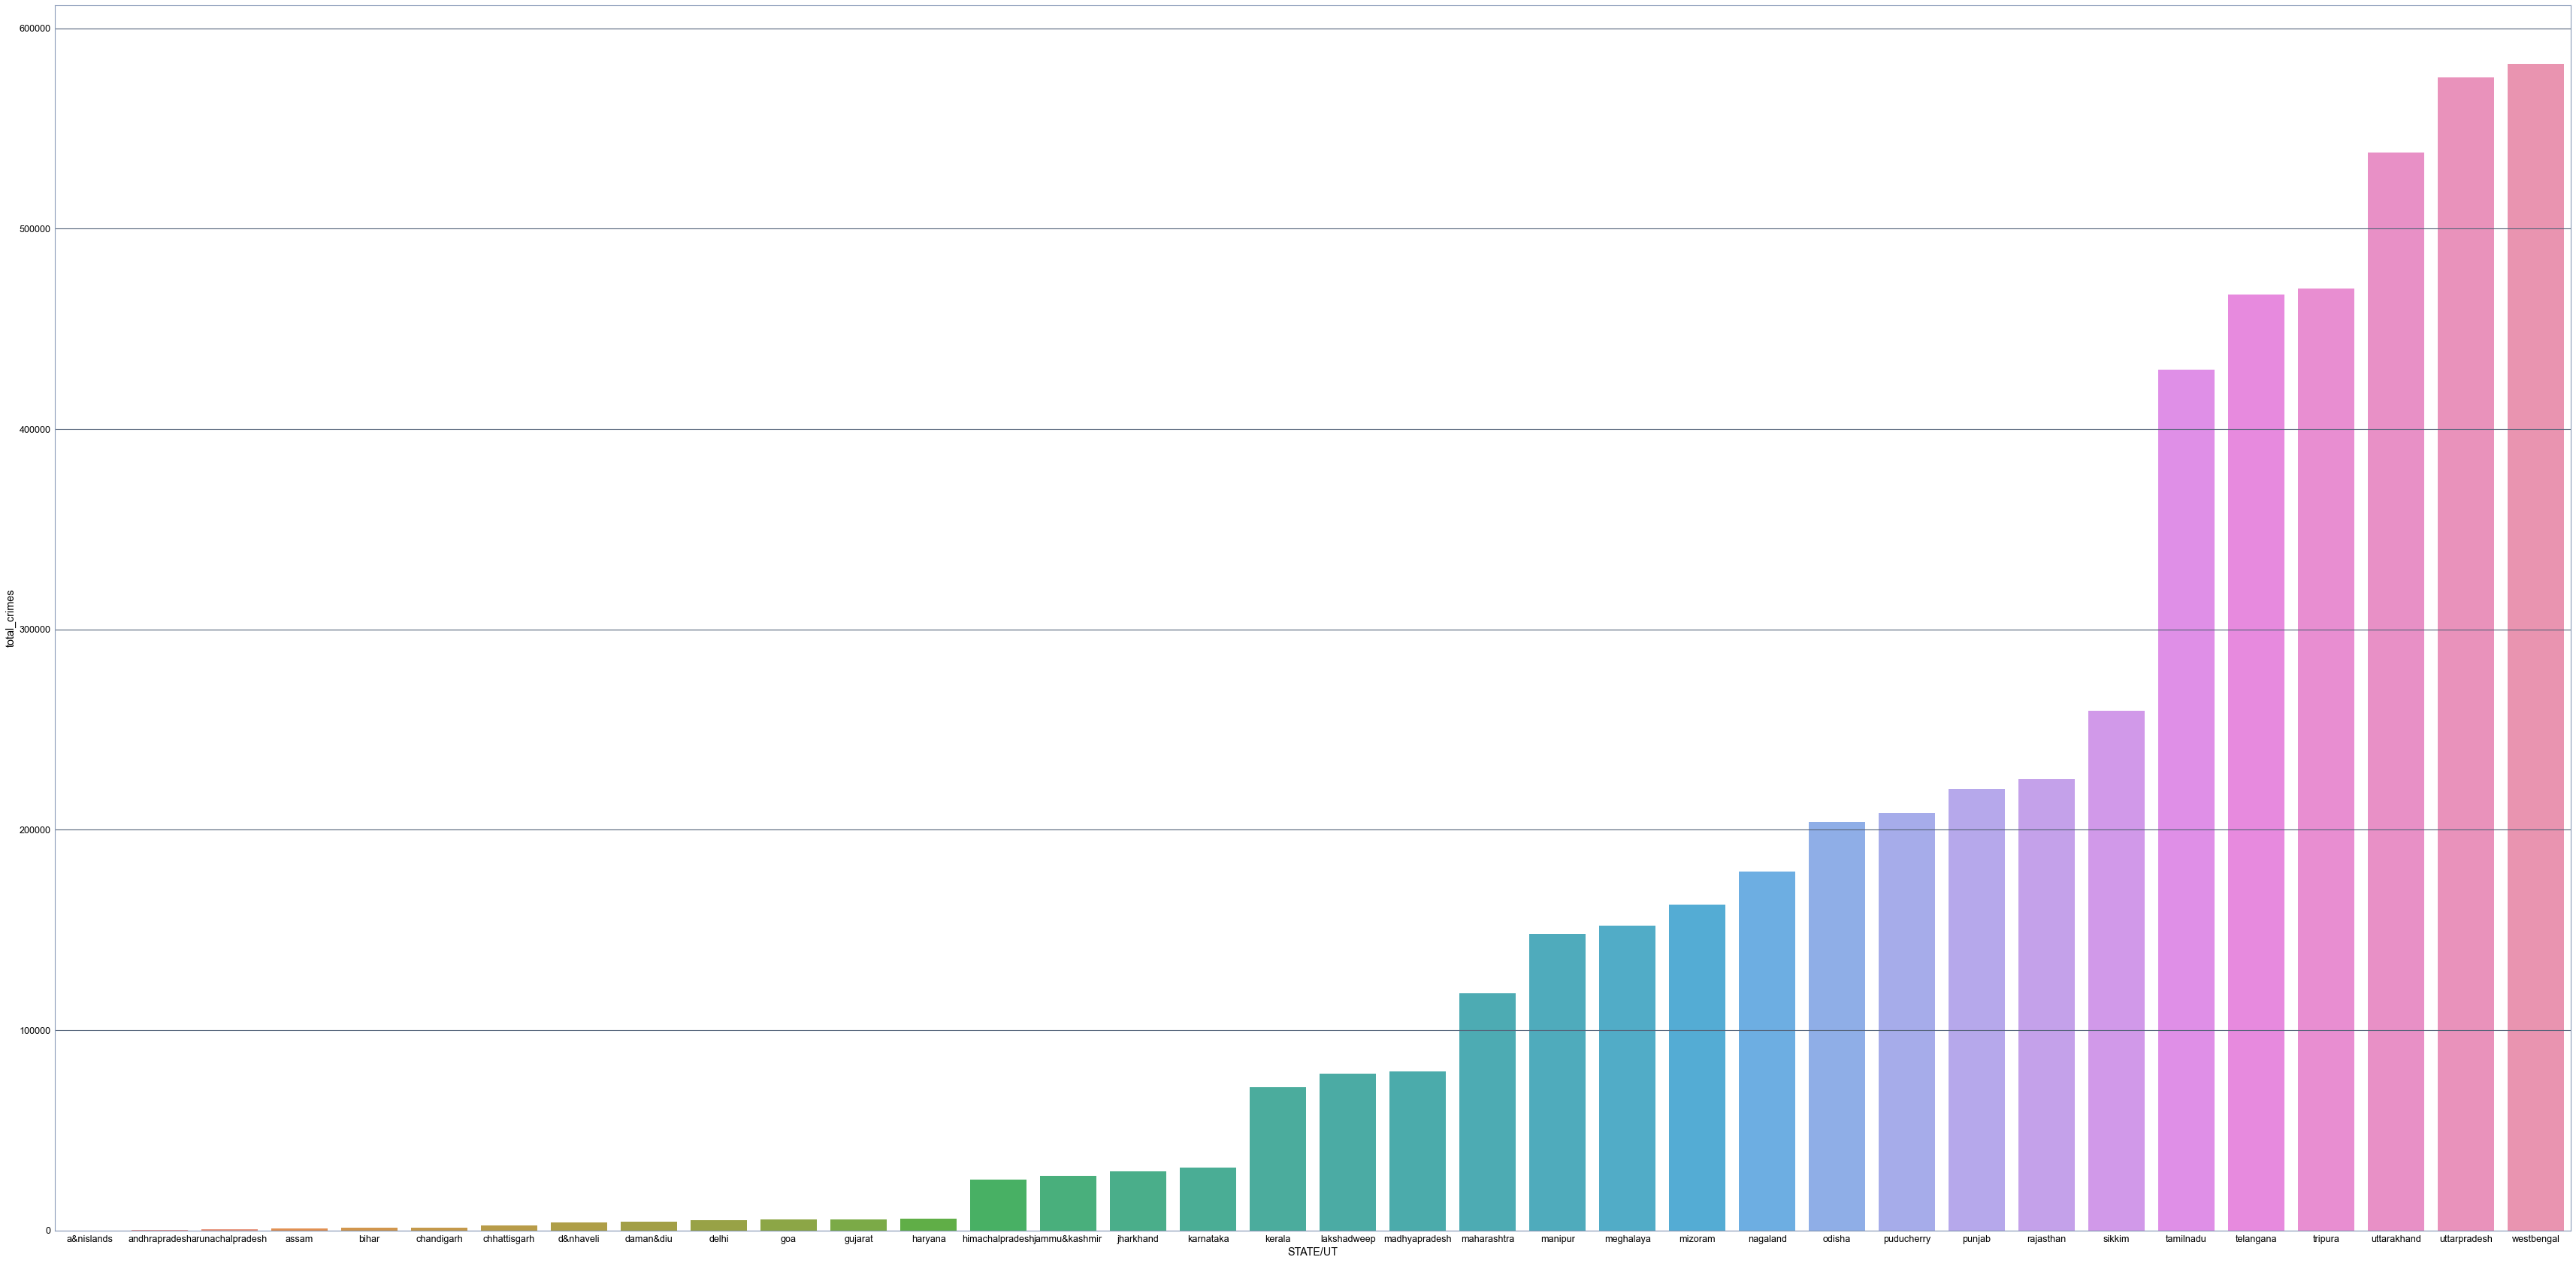

In [60]:
df_state=pd.DataFrame()
for i in crimes:
    df_state_crimes=df.groupby(['STATE/UT'])[i].sum()
    df_state[i]=df_state_crimes

plt.figure(facecolor='white',figsize=(60,30))
df_new=df_state.sort_values(by=['total_crimes'])
sns.barplot(data = df_new,x = df_state.index,y = 'total_crimes')

In [61]:
df_state = df_state.sort_values(by = 'total_crimes', ascending = False)
most_criminal_states = df_state[:3]
most_criminal_states

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
STATE/UT,,,,,,,,
uttarpradesh,51150,135906,57256,91212,53130,193738,6,582398
andhrapradesh,32150,34504,13844,126952,86964,280906,34,575354
westbengal,47876,61158,12308,66908,5348,344124,254,537976


As we can see the countries with more crimes in are **Uttar Pradesh**, **Andhra Pradesh**, **West Bengal**, **Rajasthan**, **Madhya Pradesh**.

In [62]:
least_criminal_states = df_state[-3:]
least_criminal_states

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
STATE/UT,,,,,,,,
d&nhaveli,132,224,2,106,12,90,0,566
daman&diu,60,44,6,40,4,76,0,230
lakshadweep,20,2,0,14,4,14,0,54


While the countries with least crimes are **Sikkim**, **Nagaland**, **D&nhaveli**, **Daman & Diu** and **Lakshadweep**

# **Sort Analysis of the 3 states with most crimes**

**Uttar Pradesh**

![](https://dz01iyojmxk8t.cloudfront.net/wp-content/uploads/2019/09/18165138/FB-uttar-pradesh.jpg)

In [63]:
df_up=df.loc[df['STATE/UT']=='uttarpradesh']

df_up1=pd.DataFrame()
for i in crimes:
    df_u=df_up.groupby(['Year'])[i].sum()
    df_up1[i]=df_u
df_up1

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
Year,,,,,,,,
2001,3916,5758,4422,5740,5150,14730,0,39716
2002,2830,4596,3786,4290,3774,11358,0,30634
2003,1822,2998,2644,2196,9940,5252,0,24852
2004,2794,4648,3416,3800,5364,9900,6,29928
2005,2434,4512,3128,3670,5762,9010,0,28516
2006,2628,5102,3596,4192,5428,10408,0,31354
2007,3296,6726,4152,5044,5764,15300,0,40282
2008,3742,8878,4474,5910,6748,16624,0,46376
2009,3518,10156,4464,5564,5048,17132,0,45882


In [64]:
fig = make_subplots(rows = 4, cols = 2, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=("Rape","Dowry Deaths",
                                    "Kidnapping and Abduction",
                                    "Assault on women to outrage",
                                    "Insult to modesty of Women",
                                    "Cruelty by Husband or his Relatives",
                                    "Importation of Girls", "total_crimes"))

fig.add_trace(go.Scatter(x = df_up1.index, y = df_up1['Rape']),row = 1, col = 1)
fig.add_trace(go.Scatter(x = df_up1.index, y = df_up1['Dowry Deaths']),row = 1, col = 2)
fig.add_trace(go.Scatter(x = df_up1.index, y = df_up1['Kidnapping and Abduction']),row = 2, col = 1)
fig.add_trace(go.Scatter(x = df_up1.index, y = df_up1['Assault on women with intent to outrage her modesty']),row = 2, col = 2)
fig.add_trace(go.Scatter(x = df_up1.index, y = df_up1['Insult to modesty of Women']),row = 3, col = 1)
fig.add_trace(go.Scatter(x = df_up1.index, y = df_up1['Cruelty by Husband or his Relatives']),row = 3, col = 2)
fig.add_trace(go.Scatter(x = df_up1.index, y = df_up1['Importation of Girls']),row= 4 , col = 1)
fig.add_trace(go.Scatter(x = df_up1.index, y = df_up1['total_crimes']),row = 4, col = 2)

fig.update_layout(height=700, showlegend=False)

fig.show()

**Andhra Pradesh**

![](https://static.investindia.gov.in/s3fs-public/styles/clusters_banner/public/2018-12/Industrial%20Corridors_Andhra%20Pradesh.jpg?itok=GV9bbAc8)

In [65]:
df_ap=df.loc[df['STATE/UT']=='andhrapradesh']
df_ap1=pd.DataFrame()
for i in crimes:
    df_a=df_ap.groupby(['Year'])[i].sum()
    df_ap1[i]=df_a
df_ap1

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
Year,,,,,,,,
2001,1742,1530,840,7088,4542,11582,14,27338
2002,2004,1708,898,7598,4048,14036,0,30292
2003,1892,1862,932,8256,4572,16334,10,33858
2004,2032,2060,1024,7634,4620,16776,4,34150
2005,1870,1990,886,7190,5016,17392,6,34350
2006,2098,2658,1038,9068,4822,18328,0,38012
2007,2140,3128,1226,8812,6632,22670,0,44608
2008,2514,2792,1112,9460,7102,20612,0,43592
2009,2376,3052,1092,10294,7040,22594,0,46448


In [66]:
fig = make_subplots(rows = 4, cols = 2, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=("Rape","Dowry Deaths",
                                    "Kidnapping and Abduction",
                                    "Assault on women to outrage",
                                    "Insult to modesty of Women",
                                    "Cruelty by Husband or his Relatives",
                                    "Importation of Girls", "total_crimes"))

fig.add_trace(go.Scatter(x = df_ap1.index, y = df_ap1['Rape']),row = 1, col = 1)
fig.add_trace(go.Scatter(x = df_ap1.index, y = df_ap1['Dowry Deaths']),row = 1, col = 2)
fig.add_trace(go.Scatter(x = df_ap1.index, y = df_ap1['Kidnapping and Abduction']),row = 2, col = 1)
fig.add_trace(go.Scatter(x = df_ap1.index, y = df_ap1['Assault on women with intent to outrage her modesty']),row = 2, col = 2)
fig.add_trace(go.Scatter(x = df_ap1.index, y = df_ap1['Insult to modesty of Women']),row = 3, col = 1)
fig.add_trace(go.Scatter(x = df_ap1.index, y = df_ap1['Cruelty by Husband or his Relatives']),row = 3, col = 2)
fig.add_trace(go.Scatter(x = df_ap1.index, y = df_ap1['Importation of Girls']),row= 4 , col = 1)
fig.add_trace(go.Scatter(x = df_ap1.index, y = df_ap1['total_crimes']),row = 4, col = 2)

fig.update_layout(height=700, showlegend=False)

fig.show()

<AxesSubplot:xlabel='Year', ylabel='total_crimes'>

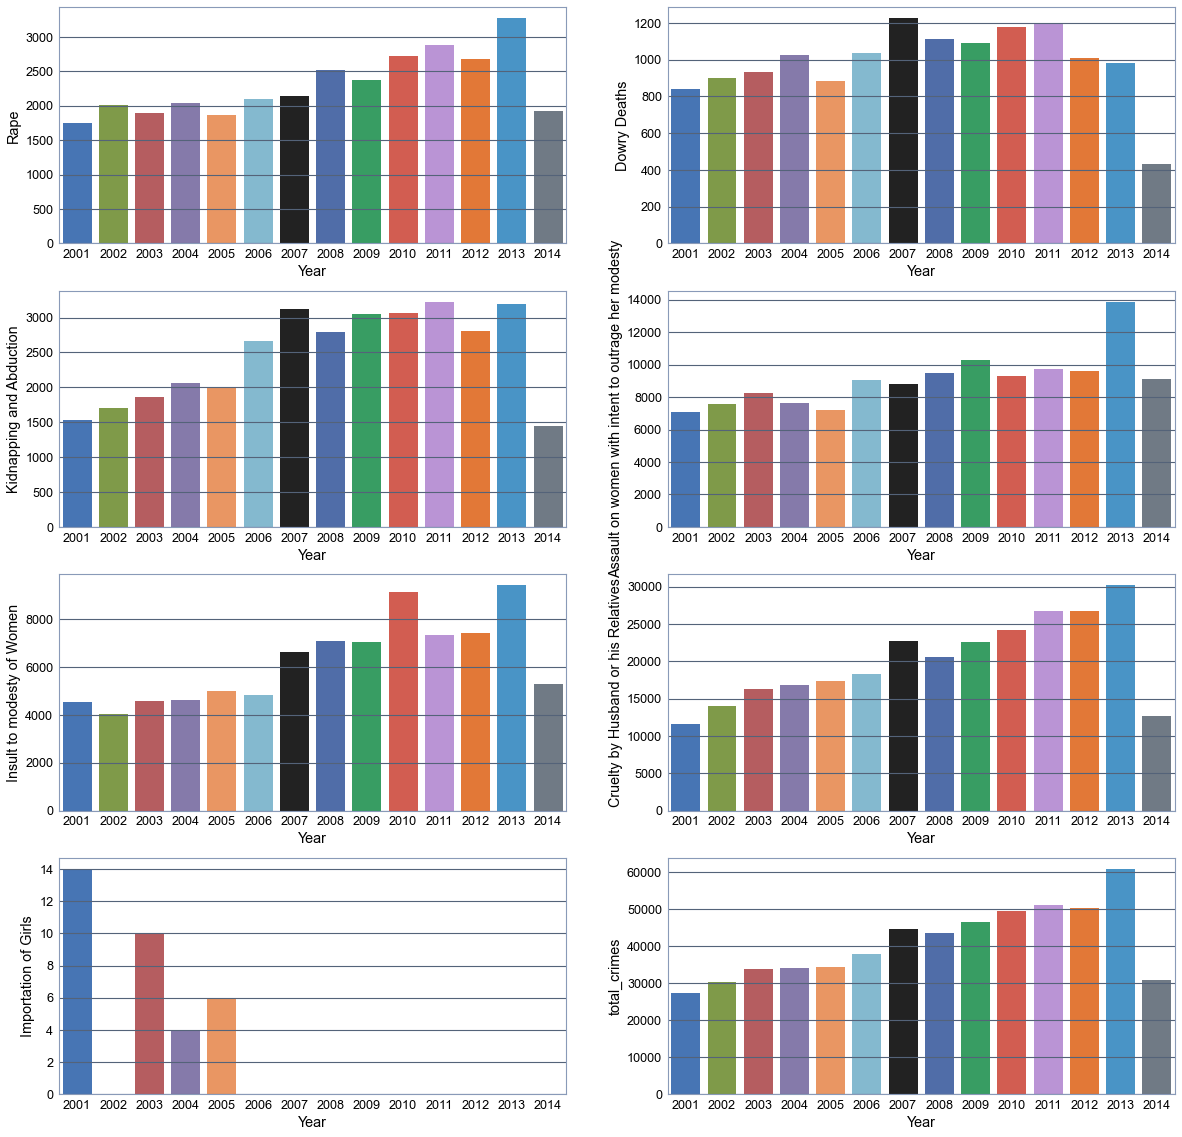

In [74]:

fig,axes = plt.subplots(4,2,facecolor='white',figsize=(20,20))
sns.barplot(ax=axes[0][0],x = df_ap1.index, y = df_ap1['Rape'])
sns.barplot(ax=axes[0][1],x = df_ap1.index, y = df_ap1['Dowry Deaths'])
sns.barplot(ax=axes[1][0],x = df_ap1.index, y = df_ap1['Kidnapping and Abduction'])
sns.barplot(ax=axes[1][1],x = df_ap1.index, y = df_ap1['Assault on women with intent to outrage her modesty'])
sns.barplot(ax=axes[2][0],x = df_ap1.index, y = df_ap1['Insult to modesty of Women'])
sns.barplot(ax=axes[2][1],x = df_ap1.index, y = df_ap1['Cruelty by Husband or his Relatives'])
sns.barplot(ax=axes[3][0],x = df_ap1.index, y = df_ap1['Importation of Girls'])
sns.barplot(ax=axes[3][1],x = df_ap1.index, y = df_ap1['total_crimes'])

**West Bengal**

![](https://th.bing.com/th/id/R0f210f33da156a2e1de7ad9d0949311b?rik=o9cFpTWvc8Ss%2fQ&riu=http%3a%2f%2fimages.indianexpress.com%2f2016%2f06%2fwest-bengal-7591.jpg&ehk=XuEsEPX9PjUhFg53g%2fnpeV%2bxOdPUnypgBCCCCJANBEc%3d&risl=&pid=ImgRaw)

In [79]:
df_wb=df.loc[df['STATE/UT']=='westbengal']
df_wb1=pd.DataFrame()
for i in crimes:
    df_w=df_wb.groupby(['Year'])[i].sum()
    df_wb1[i]=df_w
df_wb1

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
Year,,,,,,,,
2001,1418,1390,530,1908,96,7718,6,13066
2002,1518,1388,546,1928,68,8138,2,13588
2003,2004,1602,658,2372,142,9896,2,16676
2004,2950,2036,792,3132,128,12668,24,21730
2005,3372,2078,892,3144,108,13872,122,23588
2006,3462,2398,890,3674,126,14828,2,25380
2007,4212,3180,902,4562,198,19800,10,32864
2008,4526,3814,902,4792,188,27326,10,41558
2009,4672,4374,1012,3884,216,32224,10,46392


In [80]:
fig = make_subplots(rows = 4, cols = 2, shared_xaxes=True,
                    vertical_spacing=0.1,
                    subplot_titles=("Rape","Dowry Deaths",
                                    "Kidnapping and Abduction",
                                    "Assault on women to outrage",
                                    "Insult to modesty of Women",
                                    "Cruelty by Husband or his Relatives",
                                    "Importation of Girls", "total_crimes"))

fig.add_trace(go.Scatter(x = df_wb1.index, y = df_wb1['Rape']),row = 1, col = 1)
fig.add_trace(go.Scatter(x = df_wb1.index, y = df_wb1['Dowry Deaths']),row = 1, col = 2)
fig.add_trace(go.Scatter(x = df_wb1.index, y = df_wb1['Kidnapping and Abduction']),row = 2, col = 1)
fig.add_trace(go.Scatter(x = df_wb1.index, y = df_wb1['Assault on women with intent to outrage her modesty']),row = 2, col = 2)
fig.add_trace(go.Scatter(x = df_wb1.index, y = df_wb1['Insult to modesty of Women']),row = 3, col = 1)
fig.add_trace(go.Scatter(x = df_wb1.index, y = df_wb1['Cruelty by Husband or his Relatives']),row = 3, col = 2)
fig.add_trace(go.Scatter(x = df_wb1.index, y = df_wb1['Importation of Girls']),row= 4 , col = 1)
fig.add_trace(go.Scatter(x = df_wb1.index, y = df_wb1['total_crimes']),row = 4, col = 2)

fig.update_layout(height=700, showlegend=False)

fig.show()

**I hope that these numbers will drop drastically in the coming years because in the modern era it makes no sense, in my opinion, to carry on the stereotype of a patriarchal mindset and women being inferior to men and consequently all these crimes.**